In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import matplotlib.pyplot as plt
import json
import csv

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from matplotlib.legend_handler import HandlerLine2D

print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test', 'state_labels.csv', 'color_labels.csv', 'train_sentiment', 'test_images', 'train_images', 'train_metadata', 'test_metadata', 'test_sentiment', 'train', 'breed_labels.csv']


In [2]:
# Created dictionary of each pet id with its corresponding documentSentiment magnitude
pets_sentiment = {}
for filename in os.listdir('../input/train_sentiment'):
    with open('../input/train_sentiment/' + filename) as f:
        petid = filename.split('.')[0]
        data = json.load(f)
        overall_sentiment = data['documentSentiment']['score']
        pets_sentiment[petid] = overall_sentiment

In [3]:
# Added the associated speed for each pet
with open("../input/train/train.csv") as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['PetID'] in pets_sentiment:
                pets_sentiment[row['PetID']] = (pets_sentiment[row['PetID']], row['AdoptionSpeed'])

{0: 0.2960937499999997, 1: 0.26663275686673477, 2: 0.2744751664106505, 3: 0.274433249370277, 4: 0.3014154457412461}


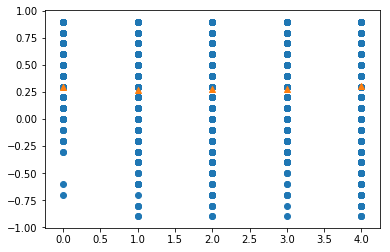

In [4]:
# Found the avg sentiment magnitude for each adoption speed class. Plotted all the data corresponding to speed
sentiments, speeds = zip(*pets_sentiment.values())
int_speeds = list(map(int, speeds))
avg_sentiments = {0:[0],1:[0],2:[0],3:[0],4:[0]}
for i in range(len(int_speeds)):
    avg_sentiments[int_speeds[i]].append(sentiments[i])
for sp in avg_sentiments:
    avg_sentiments[sp] = sum(avg_sentiments[sp])/(len(avg_sentiments[sp])-1)
print(avg_sentiments)
actual_avgs = list(avg_sentiments.values())
fig = plt.figure()
plt.scatter(int_speeds, sentiments)
plt.scatter([0,1,2,3,4], actual_avgs, marker='^')

In [60]:
# Normalizing the data
df = pd.read_csv("../input/train/train.csv", sep=",")
labels = df['AdoptionSpeed']
df = df.drop(['Name', 'RescuerID', 'Description', 'PetID', 'AdoptionSpeed'], axis=1)

cols_to_norm = ['Age','VideoAmt', 'PhotoAmt', 'Fee']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

normalized_df = (df - df.min())/(df.max() - df.min())
normalized_df['AdoptionSpeed'] = labels
df.head()
df.to_csv("train_clean.csv", index=False)
normalized_df.to_csv("train_all_norm.csv", index=False)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


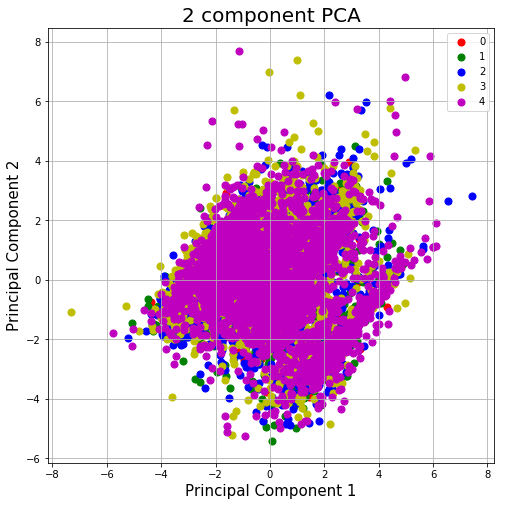

In [6]:
# Running PCA to get data to 3-D
pca = PCA(2)
newdata = pca.fit_transform(df)
ss = StandardScaler()
df_pca = pca.fit_transform(ss.fit_transform(df))

principalDf = pd.DataFrame(data=df_pca,
                          columns= ['pc1', 'pc2'])
finalDf = pd.concat([principalDf, labels], axis=1)


fig2 = plt.figure(figsize = (8,8))
ax = fig2.add_subplot(111)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2, 3, 4]
colors = ['r', 'g', 'b', 'y', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['AdoptionSpeed'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


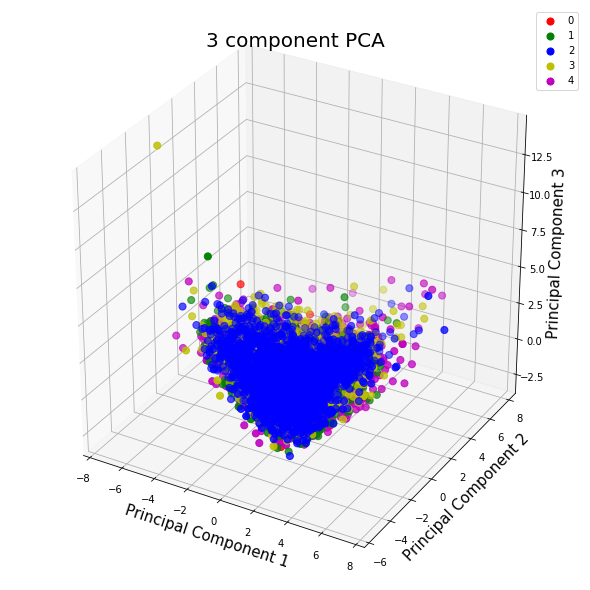

In [7]:
# PCA but in 3D
# Running PCA to get data to 3-D
pca = PCA(3)
newdata = pca.fit_transform(df)
ss = StandardScaler()
df_pca = pca.fit_transform(ss.fit_transform(df))

principalDf = pd.DataFrame(data=df_pca,
                          columns= ['pc1', 'pc2', 'pc3'])
finalDf = pd.concat([principalDf, labels], axis=1)


# Define figure and 3D axes
fig3 = plt.figure(figsize = (8,8))
ax = Axes3D(fig3)

targets = [0, 1, 2, 3, 4]
colors = ['r', 'g', 'b', 'y', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['AdoptionSpeed'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , finalDf.loc[indicesToKeep, 'pc3']
               , c = color
               , s = 50)


# Label the axes
ax.set_title('3 component PCA', fontsize = 20)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.legend(targets)
ax.grid()



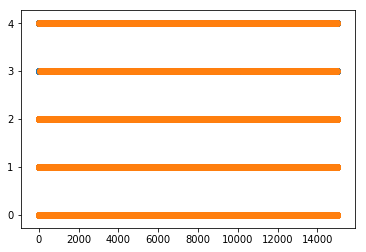

In [25]:
## Trying out KMEANS
kmeans = KMeans(n_clusters=5, random_state=0).fit(df)
kmeans.labels_
x = range(len(labels))
results = kmeans.predict(df)
plt.scatter(x,labels.tolist())
plt.scatter(x, results.tolist())

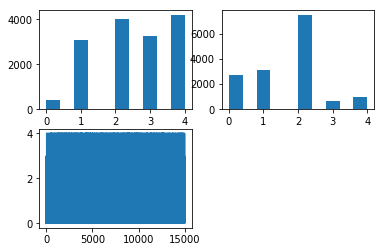

In [26]:
diff = [abs(a_i - b_i) for a_i, b_i in zip(labels.tolist(), results.tolist())]
fig = plt.figure()
plt.subplot(2, 2, 1)
plt.hist(labels.tolist())
plt.subplot(2, 2, 2)
plt.hist(results.tolist())
plt.subplot(2,2,3)
plt.plot(x,diff)

(array([ 997.,    0.,  665.,    0.,    0., 1859.,    0.,  116.,    0.,
         311.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

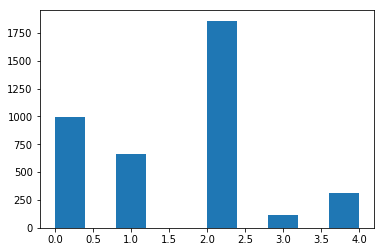

In [27]:
df_test = pd.read_csv("../input/test/test.csv", sep=",")
df_test = df_test.drop(['Name', 'RescuerID', 'Description', 'PetID'], axis=1)

results_test = kmeans.predict(df_test)
plt.hist(results_test)


In [ ]:
df = df.drop(['Breed1', 'Breed2', 'Fee', 'VideoAmt'],axis=1)
df.head()

(14993,)


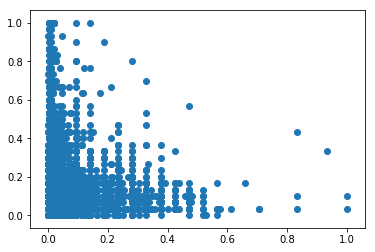

In [28]:
kmeans2 = KMeans(n_clusters=5, random_state=0).fit_predict(df)
print(kmeans2.shape)
plt.scatter(df['Age'], df['PhotoAmt'])

In [61]:
#One-hot encoding
categorical_cols = ['Type', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
                    'Sterilized', 'Health']
for col in categorical_cols:
    # use pd.concat to join the new columns with your original dataframe
    df = pd.concat([df,pd.get_dummies(df[col], prefix=col)],axis=1)

    # now drop the original 'country' column (you don't need it anymore)
    df.drop([col],axis=1, inplace=True)
df.head()

,Age,Breed1,Breed2,Quantity,Fee,State,VideoAmt,PhotoAmt,Type_1,Type_2,Gender_1,Gender_2,Gender_3,Color1_1,Color1_2,Color1_3,Color1_4,Color1_5,Color1_6,Color1_7,Color2_0,Color2_2,Color2_3,Color2_4,Color2_5,Color2_6,Color2_7,Color3_0,Color3_3,Color3_4,Color3_5,Color3_6,Color3_7,MaturitySize_1,MaturitySize_2,MaturitySize_3,MaturitySize_4,FurLength_1,FurLength_2,FurLength_3,Vaccinated_1,Vaccinated_2,Vaccinated_3,Dewormed_1,Dewormed_2,Dewormed_3,Sterilized_1,Sterilized_2,Sterilized_3,Health_1,Health_2,Health_3
0,0.011765,299,0,1,0.033333,41326,0.0,0.033333,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
1,0.003922,265,0,1,0.000000,41401,0.0,0.066667,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0
2,0.003922,307,0,1,0.000000,41326,0.0,0.233333,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
3,0.015686,307,0,1,0.050000,41401,0.0,0.266667,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
4,0.003922,307,0,1,0.000000,41326,0.0,0.100000,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0


In [62]:
## Getting rid of the breeds because there are 600 additional features being added in
df = df.drop(['Breed1', 'Breed2', 'State'], axis=1)
df.head()

,Age,Quantity,Fee,VideoAmt,PhotoAmt,Type_1,Type_2,Gender_1,Gender_2,Gender_3,Color1_1,Color1_2,Color1_3,Color1_4,Color1_5,Color1_6,Color1_7,Color2_0,Color2_2,Color2_3,Color2_4,Color2_5,Color2_6,Color2_7,Color3_0,Color3_3,Color3_4,Color3_5,Color3_6,Color3_7,MaturitySize_1,MaturitySize_2,MaturitySize_3,MaturitySize_4,FurLength_1,FurLength_2,FurLength_3,Vaccinated_1,Vaccinated_2,Vaccinated_3,Dewormed_1,Dewormed_2,Dewormed_3,Sterilized_1,Sterilized_2,Sterilized_3,Health_1,Health_2,Health_3
0,0.011765,1,0.033333,0.0,0.033333,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
1,0.003922,1,0.000000,0.0,0.066667,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0
2,0.003922,1,0.000000,0.0,0.233333,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
3,0.015686,1,0.050000,0.0,0.266667,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
4,0.003922,1,0.000000,0.0,0.100000,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0


In [50]:
clf = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=0)
clf.fit(df, labels)
y_pred = clf.predict(df)
print(clf.score(df, y_pred))
print(clf.score(df, labels))

1.0
0.9708530647635564


In [48]:
# Splitting training data
x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size=0.25)
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=0)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(rf.score(x_test, y_pred))
print(rf.score(x_test, y_test))

1.0
0.39343825020005335


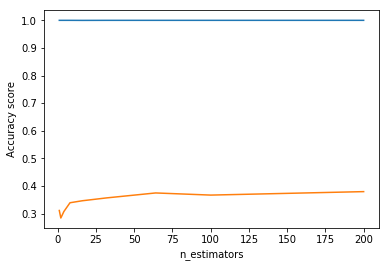

In [63]:
### In depth parameter tuning: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    y_pred = rf.predict(x_test)
    train_results.append(rf.score(x_train, train_pred))
    test_results.append(rf.score(x_test, y_test))
    

plt.plot(n_estimators, train_results)
plt.plot(n_estimators, test_results)
plt.ylabel("Accuracy score")
plt.xlabel("n_estimators")
plt.show()

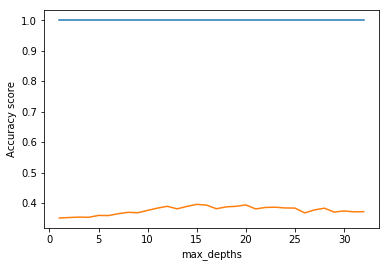

In [64]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for depth in max_depths:
    rf = RandomForestClassifier(n_estimators= 100, max_depth=depth, n_jobs=-1)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    y_pred = rf.predict(x_test)
    train_results.append(rf.score(x_train, train_pred))
    test_results.append(rf.score(x_test, y_test))
    

plt.plot(max_depths, train_results)
plt.plot(max_depths, test_results)
plt.ylabel("Accuracy score")
plt.xlabel("max_depths")
plt.show()

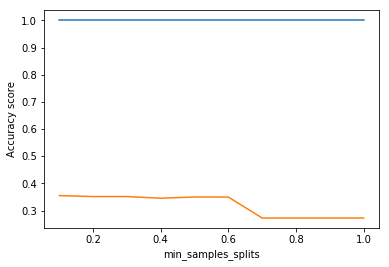

In [65]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(n_estimators=100, min_samples_split=min_samples_split)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    y_pred = rf.predict(x_test)
    train_results.append(rf.score(x_train, train_pred))
    test_results.append(rf.score(x_test, y_test))
    
plt.plot(min_samples_splits, train_results)
plt.plot(min_samples_splits, test_results)
plt.ylabel("Accuracy score")
plt.xlabel("min_samples_splits")
plt.show()

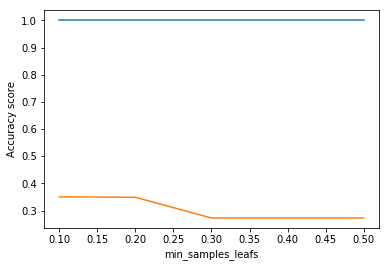

In [66]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=min_samples_leaf)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    y_pred = rf.predict(x_test)
    train_results.append(rf.score(x_train, train_pred))
    test_results.append(rf.score(x_test, y_test))
    
plt.plot(min_samples_leafs, train_results)
plt.plot(min_samples_leafs, test_results)
plt.ylabel("Accuracy score")
plt.xlabel("min_samples_leafs")
plt.show()

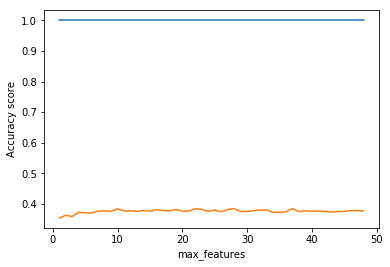

In [67]:
max_features = list(range(1,df.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    rf = RandomForestClassifier(n_estimators=100, max_features=max_feature)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    y_pred = rf.predict(x_test)
    train_results.append(rf.score(x_train, train_pred))
    test_results.append(rf.score(x_test, y_test))
    
plt.plot(max_features, train_results)
plt.plot(max_features, test_results)
plt.ylabel("Accuracy score")
plt.xlabel("max_features")
plt.show()

If you've made it this far, i think we are a little screwed :)